In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
housing = pd.read_csv("housing.csv", sep=",")

Datensatz zu finden unter: https://www.kaggle.com/datasets/yasserh/housing-prices-dataset/data

In [3]:
housing.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


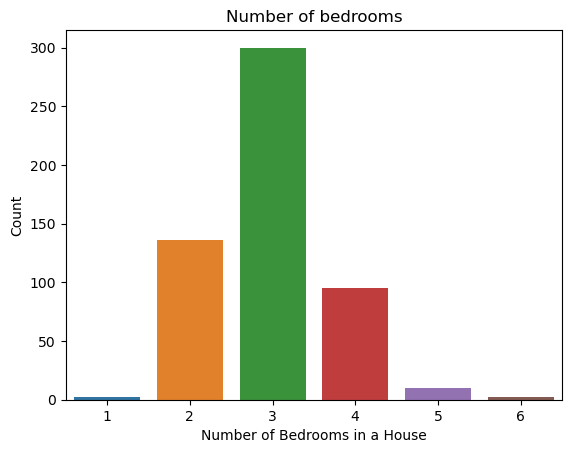

In [4]:
fig, ax = plt.subplots()
sns.countplot(data = housing, x = "bedrooms", ax=ax)

ax.set_title("Number of bedrooms")
ax.set_xlabel("Number of Bedrooms in a House")
ax.set_ylabel("Count")

plt.show()

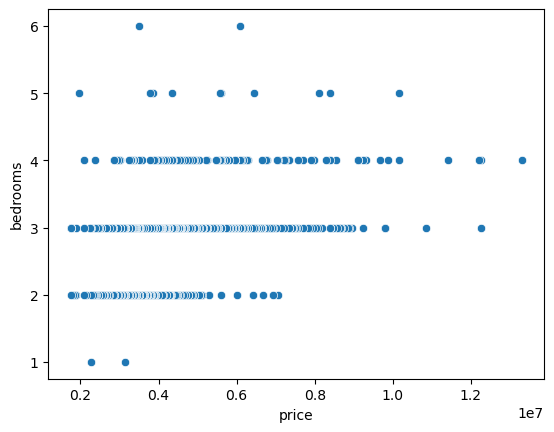

In [5]:
fig, ax = plt.subplots()
sns.scatterplot(
    x=housing["price"], y=housing["bedrooms"], ax=ax)

plt.show()

In [6]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [7]:
model1 = smf.glm(
    "bedrooms ~ price", 
    data=housing, 
    family=sm.families.Poisson(sm.genmod.families.links.log()), #log: verwendung der logrithmus-funktion
)

C:\Users\miria\anaconda3\lib\site-packages\statsmodels\genmod\families\links.py:13: FutureWarning: The log link alias is deprecated. Use Log instead. The log link alias will be removed after the 0.15.0 release.
  warnings.warn(


In [8]:
model2 = smf.glm(
    "bedrooms ~ stories", 
    data=housing, 
    family=sm.families.Poisson(sm.genmod.families.links.log()),
)

C:\Users\miria\anaconda3\lib\site-packages\statsmodels\genmod\families\links.py:13: FutureWarning: The log link alias is deprecated. Use Log instead. The log link alias will be removed after the 0.15.0 release.
  warnings.warn(


In [9]:
model3 = smf.glm(
    "bedrooms ~ price + stories", 
    data=housing, 
    family=sm.families.Poisson(sm.genmod.families.links.log()),
)

C:\Users\miria\anaconda3\lib\site-packages\statsmodels\genmod\families\links.py:13: FutureWarning: The log link alias is deprecated. Use Log instead. The log link alias will be removed after the 0.15.0 release.
  warnings.warn(


In [10]:
results1 = model1.fit()


In [11]:
results2 = model2.fit()

In [12]:
results3 = model3.fit()

In [13]:
results1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:               bedrooms   No. Observations:                  545
Model:                            GLM   Df Residuals:                      543
Model Family:                 Poisson   Df Model:                            1
Link Function:                    log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -847.80
Date:                Thu, 18 Jan 2024   Deviance:                       86.215
Time:                        01:00:31   Pearson chi2:                     88.5
No. Iterations:                     4   Pseudo R-squ. (CS):            0.02349
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.8626      0.067     12.855      0.000       0.731       0.994
price       4.624e-08   1.26e-08      3.663      0.000    2.15e-08     7.1e-08
==============================================================================
"""

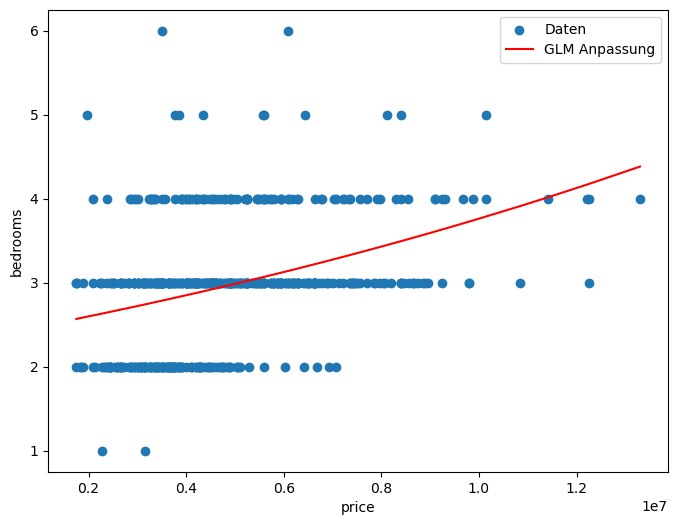

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.scatter(housing['price'], housing['bedrooms'], label='Daten')
plt.plot(housing['price'], results1.predict(), color='red', label='GLM Anpassung')
plt.xlabel('price')
plt.ylabel('bedrooms')
plt.legend()
plt.show()

In [15]:
results2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:               bedrooms   No. Observations:                  545
Model:                            GLM   Df Residuals:                      543
Model Family:                 Poisson   Df Model:                            1
Link Function:                    log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -846.22
Date:                Thu, 18 Jan 2024   Deviance:                       83.056
Time:                        01:00:33   Pearson chi2:                     85.2
No. Iterations:                     4   Pseudo R-squ. (CS):            0.02913
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.8811      0.057     15.366      0.000       0.769       0.993
stories        0.1113      0.027      4.081      0.000       0.058       0.165
==============================================================================
"""

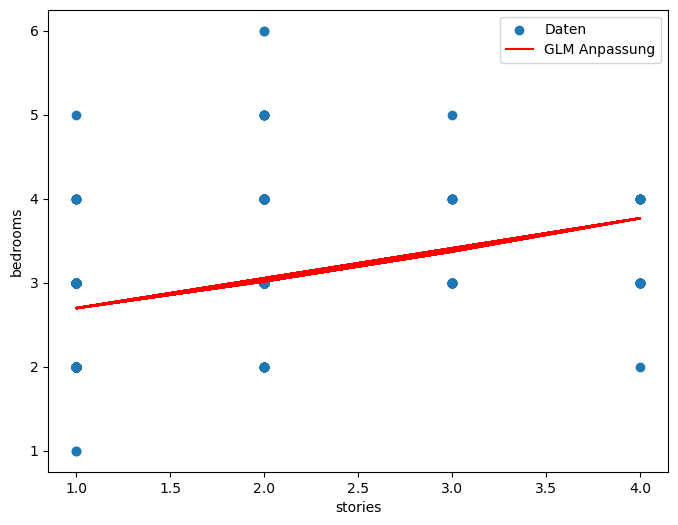

In [16]:
plt.figure(figsize=(8, 6))
plt.scatter(housing['stories'], housing['bedrooms'], label='Daten')
plt.plot(housing['stories'], results2.predict(), color='red', label='GLM Anpassung')
plt.xlabel('stories')
plt.ylabel('bedrooms')
plt.legend()
plt.show()

In [17]:
results3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:               bedrooms   No. Observations:                  545
Model:                            GLM   Df Residuals:                      542
Model Family:                 Poisson   Df Model:                            2
Link Function:                    log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -844.05
Date:                Thu, 18 Jan 2024   Deviance:                       78.717
Time:                        01:00:35   Pearson chi2:                     81.1
No. Iterations:                     4   Pseudo R-squ. (CS):            0.03683
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.7883      0.073     10.873      0.000       0.646       0.930
price       2.976e-08   1.41e-08      2.106      0.035    2.06e-09    5.75e-08
stories        0.0834      0.030      2.755      0.006       0.024       0.143
==============================================================================
"""

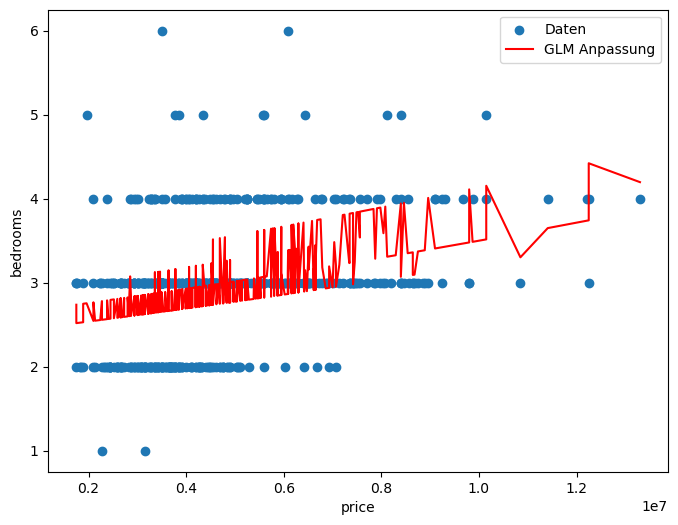

In [18]:
plt.figure(figsize=(8, 6))
plt.scatter(housing['price'], housing['bedrooms'], label='Daten')
plt.plot(housing['price'], results3.predict(), color='red', label='GLM Anpassung')
plt.xlabel('price')
plt.ylabel('bedrooms')
plt.legend()
plt.show()

## Zum Vergleich eine Lineare Regression

In [19]:
model4 = smf.glm(
    "price ~ bedrooms", 
    data=housing, 
)

In [20]:
results4 = model4.fit()

In [21]:
results4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  price   No. Observations:                  545
Model:                            GLM   Df Residuals:                      543
Model Family:                Gaussian   Df Model:                            1
Link Function:               Identity   Scale:                      3.0342e+12
Method:                          IRLS   Log-Likelihood:                -8604.2
Date:                Thu, 18 Jan 2024   Deviance:                   1.6476e+15
Time:                        01:00:40   Pearson chi2:                 1.65e+15
No. Iterations:                     3   Pseudo R-squ. (CS):             0.1432
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   2.013e+06   3.09e+05      6.510      0.000    1.41e+06    2.62e+06
bedrooms    9.288e+05   1.01e+05      9.179      0.000     7.3e+05    1.13e+06
==============================================================================
"""

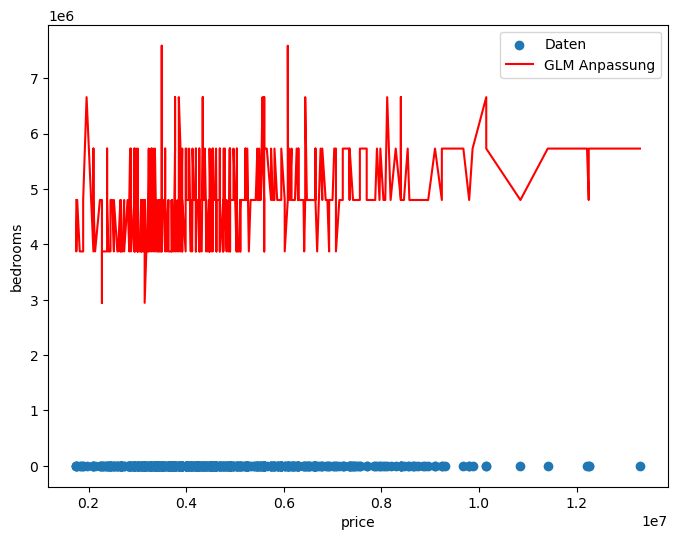

In [22]:
plt.figure(figsize=(8, 6))
plt.scatter(housing['price'], housing['bedrooms'], label='Daten')
plt.plot(housing['price'], results4.predict(), color='red', label='GLM Anpassung')
plt.xlabel('price')
plt.ylabel('bedrooms')
plt.legend()
plt.show()

## AIC (Kriterium, um Modelle miteinader zu vergleichen, also wie nahe unsere geschätzten Residuen am originalen Modell sind)

In [23]:
results1.aic

1699.5995429595346

In [24]:
results2.aic

1696.4411277404317

In [25]:
results3.aic

1694.1018373825518

In [26]:
results4.aic

17212.4682625141

# Hausaufgabe

Findet einen beliebigen Datensatz (bestenfalls mit nicht-normalverteilten Daten) und fittet mindestens 2 Modelle mithilfe eines GLMs darauf an. Vergleicht die Modelle mithilfe des AIC. 

Hilfestellung zu finden unter: https://learning.oreilly.com/library/view/pandas-for-everyone/9780137891146/ch14.xhtml#ch14